# Heart Disease Analysis

#### Features

- age : age in years
- sex : (1 = male & 0 = female)
- cp : chest pain type
    - 0: Typical angina: chest pain related decrease blood suppy to the heart
    - 1: Atypical angina: chest pain not related to heart
    - 2: Non-anginal pain: typically esophageal spasms (not heart related)
    - 3: Asymptomatic: chest pain not showing signs of disease
- trestbps : resting blood pressure (in mmHg on admission to the hospital) anything above 130-140 is typically cause for concern
- chol : serum cholestoral in mg/dl
    - serum : LDL + HDL + 0.2*triglycerides
    - above 200 is cause for concern
- fbs : (fasting blood sugar > 120 mg/dl) (1 = true & 0 = false)
    - '>126' mg/dl signals diabetes
- restecg : resting electrocardiographical results
    - 0: Nothing to note
    - 1: ST-T wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    - 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
- thalach : maximum heart rate achieved
- exang : exercise induced angina (1 = yes & 0 = no)
- oldpeak : ST depression induced by exercise relative to rest
- slope : the slope of the peak exercise ST segment
    - 0: Upsloping : better heart rate with exercise (uncommon)
    - 1: Flatsloping : minimal change (typical healthy heart)
    - 2: Downsloping : signs of unhealthy heart
- ca : number of major vessels (0-3) colored by flourosopy
    - colored vessel means the doctor can see the blood passing through
    - the more blood movement, the better (no clots)
- thal : tgalium stress result
    - 1,3: normal
    - 6: fixed defect : used to be defect but ok now
    - 7: reversable defect : no proper blood movement when exercising
- target : have disease or not
    - the predicted attribute
    - (1 = yes & 0 = no)

## Modules

In [320]:
# EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models from Sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, r2_score

# Miscellaneous imports
import warnings
import re
import pickle
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(font_scale=1)

## Initialize the dataframe

In [245]:
df = pd.read_csv('assets/heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [247]:
df.shape

(303, 14)

In [248]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [249]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Explortory Data Analysis

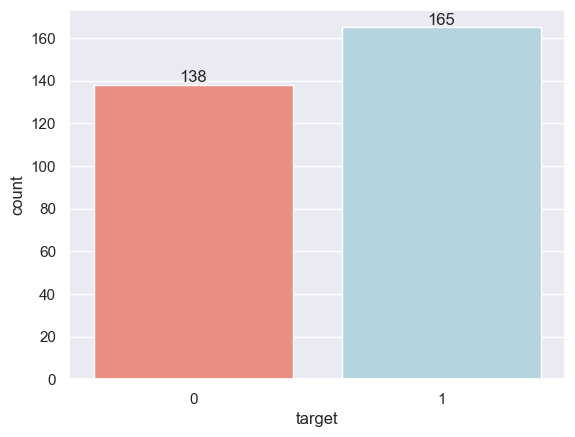

In [250]:
ax = sns.countplot(data=df, x='target', palette=['salmon', 'lightblue'])
for container in ax.containers:
    ax.bar_label(container)

plt.legend([], frameon=False)
plt.show()

In [251]:
cross = pd.crosstab(df['target'], df['sex'])
cross

sex,0,1
target,,
0,24,114
1,72,93


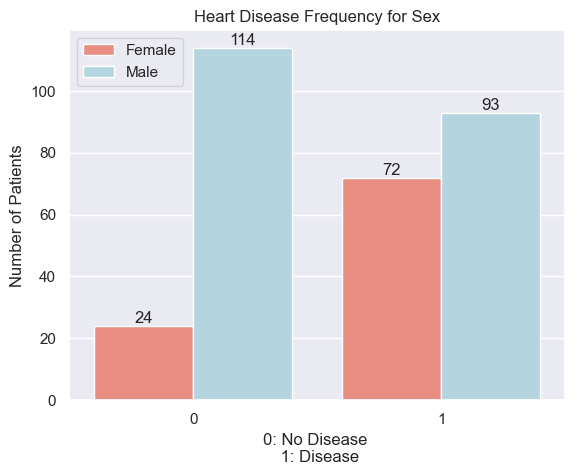

In [252]:
ax = sns.countplot(data=df, x='target', hue='sex', palette=['salmon', 'lightblue'])
for container in ax.containers:
    ax.bar_label(container)

plt.title('Heart Disease Frequency for Sex')
plt.legend(['Female', 'Male'], loc='upper left')
plt.xlabel('0: No Disease \n 1: Disease')
plt.ylabel('Number of Patients')
plt.show()

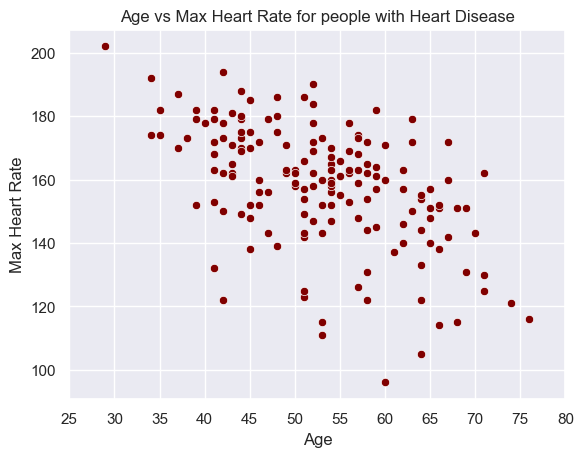

In [255]:
# plt.figure(figsize=(10, 6))

sns.scatterplot(data=df[df['target']==1], x='age', y='thalach', color='maroon')

plt.title("Age vs Max Heart Rate for people with Heart Disease")
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
# plt.xlim(25, 80)
plt.xticks(range(25, 85, 5))
plt.show()

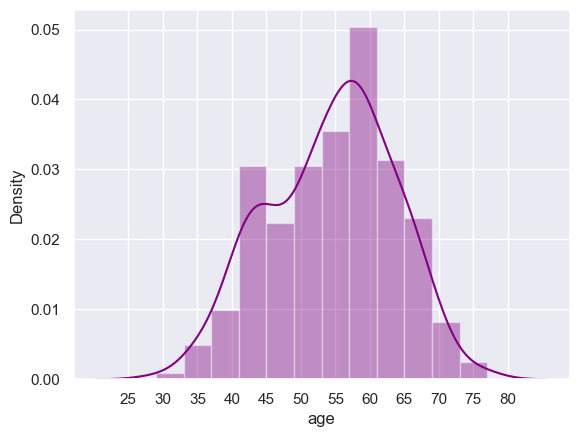

In [256]:
sns.distplot(a=df['age'], color='purple')
plt.xticks(range(25, 85, 5))
plt.show()

In [257]:
cross = pd.crosstab(df.cp, df.target)
cross

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


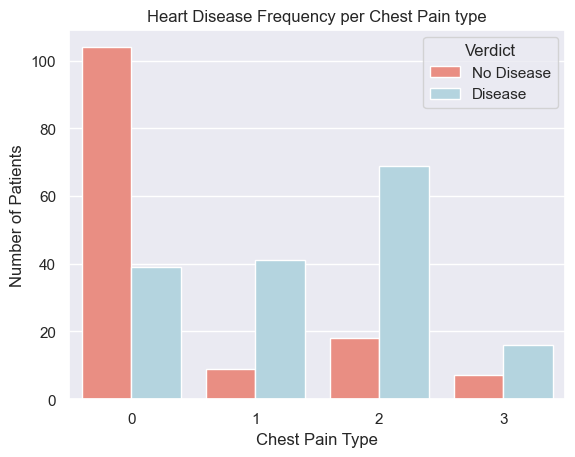

In [258]:
sns.countplot(data=df, x='cp', hue='target', palette=['salmon', 'lightblue'])
plt.title('Heart Disease Frequency per Chest Pain type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Number of Patients')
plt.legend(['No Disease', 'Disease'], title='Verdict')
plt.show()

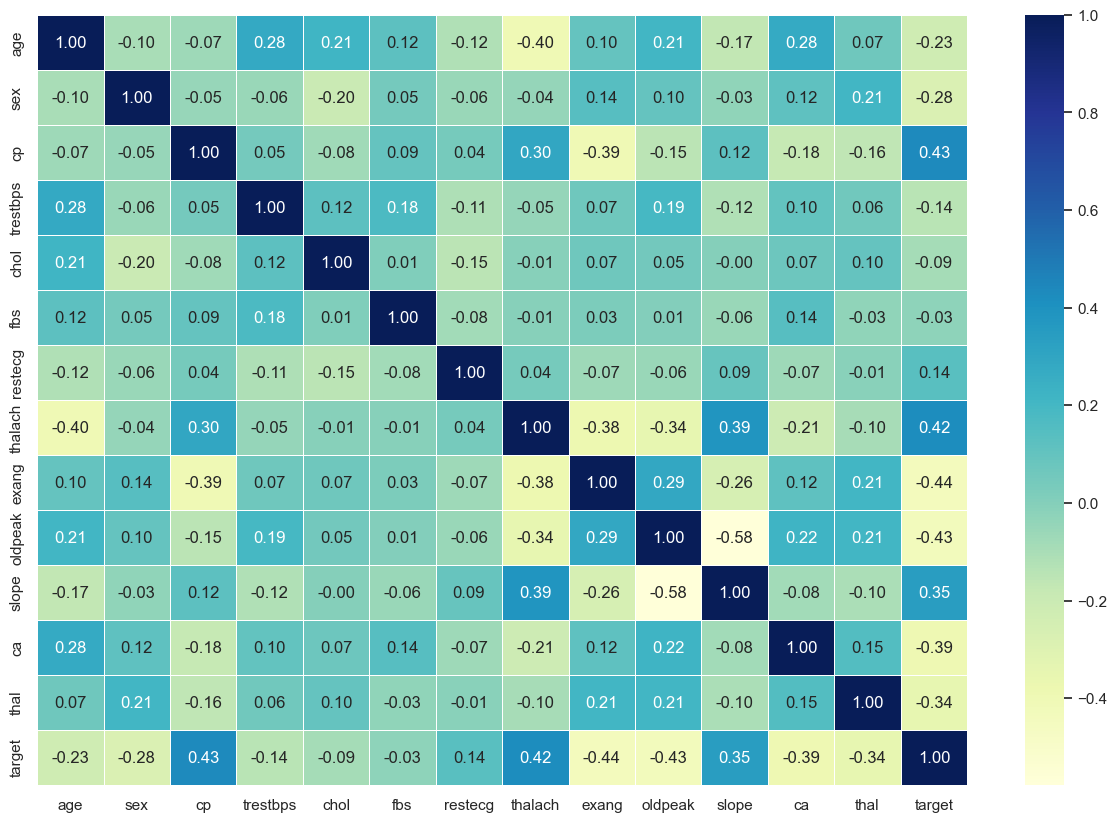

In [259]:
df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(df.corr(), annot=True, linewidth=0.5, fmt='.2f', cmap='YlGnBu')
bottom, top = ax.get_ylim()
plt.show()

## Model Training

In [260]:
X = df.drop(columns=['target'])
y = df['target']

In [261]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

##### Choosing the right model

In [262]:
models = {'Logistic Regression': LogisticRegression(), 'KNN': KNeighborsClassifier(), 'Random Forest': RandomForestClassifier()}
# print(models.items())

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluate given machine learning models.
    models: a dict of different ML models
    X_train: training data, no labels 
    X_test : testing data, no labels
    y_train: training labels
    y_test: test label
    """
    
    np.random.seed(42)
    
    # dict to keep model scores
    model_scores = {}
    
    for name, model in models.items():
        # fit the model to the data
        model.fit(X_train, y_train)
        
        # evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    
    return model_scores 

In [263]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

for key, value in model_scores.items():
    print(f"{key}: {round(value, 4)}")

Logistic Regression: 0.8852
KNN: 0.6885
Random Forest: 0.8361


##### Model Comparision

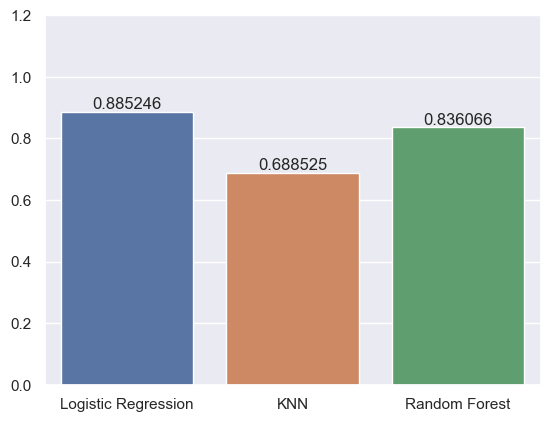

In [264]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
ax = sns.barplot(data=model_compare)
for container in ax.containers:
    ax.bar_label(container)
plt.yticks(np.arange(0, 1.4, step=0.2))
plt.show()
# model_compare


### `1. Hyperparameter Tuning`

##### 1. Hyperparameter tuning manually

#### Tuning KNN

In [265]:
train_scores = []
test_scores = []

# create a list of different values for n_neighbors
neighbors = range(1, 21)

# setup KNN instance
knn = KNeighborsClassifier()

# loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # fit the algorithm
    knn.fit(X_train, y_train)
    
    # update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # update the test scores list
    test_scores.append(knn.score(X_test, y_test))

Maximum KNN score on the test data: 75.41%


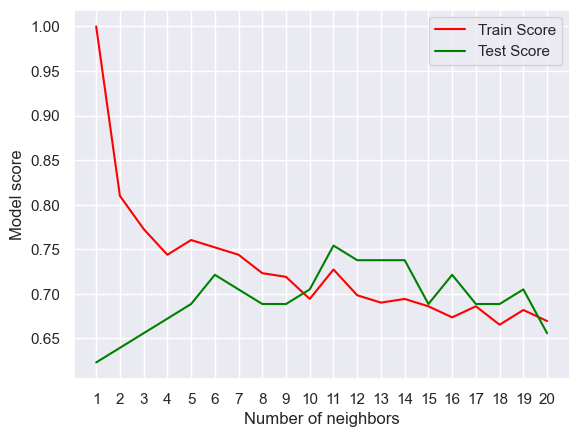

In [319]:
# plt.plot(neighbors, train_scores, label='Train score')
# plt.plot(neighbors, test_scores, label='Test score')

sns.lineplot(x=neighbors, y=train_scores, label='Train Score', color='red')
sns.lineplot(x=neighbors, y=test_scores, label='Test Score', color='green')

plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.xticks(np.arange(1, 21, 1))
plt.legend()
# plt.show()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

##### Hyperparameter tuning with RandomizedSearchCV

In [267]:
# create a hyperparamerter grid for logistic regression
log_reg_grid = {'C': np.logspace(-4, 4, 20), 'solver': ['liblinear']}

# create a hyperparameter grid for random forest classifer
rf_grid = {'n_estimators': np.arange(10, 1000, 50), 'max_depth': [None, 3, 5, 10], 
           'min_samples_split': np.arange(2, 20, 2), 'min_samples_leaf': np.arange(1, 20, 2)}


#### Tuning Logistic Regression

In [268]:
np.random.seed(42)

# setup random hyperparameter search for Logistic Regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# fit random hyperparameter seach model for logistic regression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [269]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [270]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

#### Tuning Random Forest Classifier

In [271]:
np.random.seed(42)

# setup random hyperparameter search for Random Forest
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=rf_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# fit random hyperparameter seach model for Random Forest
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [272]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [273]:
rs_rf.score(X_test, y_test)

0.8688524590163934

##### Hyperparameter tuning with GridSearchCV

In [274]:
# different hyperparameters for Logistic Regression model
log_reg_grid = {'C': np.logspace(-4, 4, 30), 'solver': ['liblinear']}

# setup grid hyperparameter search for logistic regression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [275]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [276]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## `2. Evaluation` 

##### Making predcitions with tuned model

In [277]:
y_pred = gs_log_reg.predict(X_test)

##### ROC - Receiver Operating Characteristic curve
##### calculate AUC - Area Under the Curve score

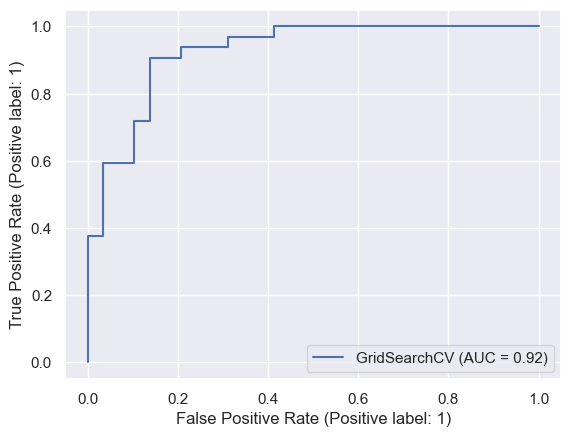

In [278]:
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)
plt.show()

##### Confusion Matrix

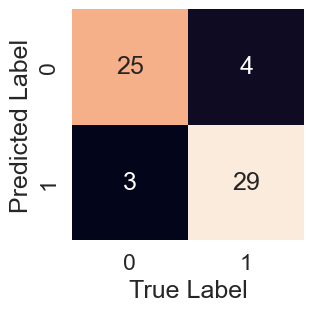

In [279]:
sns.set(font_scale=1.5)

def plot_conf_matrix(y_test, y_pred):
    """
    Plots a confusion matrix using heatmap
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cbar=False)
    
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

plot_conf_matrix(y_test, y_pred)

##### Classification Report

In [280]:
report = classification_report(y_test, y_pred, output_dict=True)

# Convert the report to a DataFrame
df_report = pd.DataFrame(report).transpose()
df_report

,precision,recall,f1-score,support
0,0.892857,0.862069,0.877193,29.000000
1,0.878788,0.906250,0.892308,32.000000
accuracy,0.885246,0.885246,0.885246,0.885246
macro avg,0.885823,0.884159,0.884750,61.000000
weighted avg,0.885477,0.885246,0.885122,61.000000


## Cross Validation

##### Create a new classifier with best parameters

In [281]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [282]:
clf = LogisticRegression(C=0.20433597178569418, solver='liblinear')

##### Cross-validated accuracy

In [283]:
cv_acc = np.mean(cross_val_score(clf, X, y, cv=5, scoring='accuracy'))
cv_acc

0.8479781420765027

##### Cross-validated precision

In [284]:
cv_presn = np.mean(cross_val_score(clf, X, y, cv=5, scoring='precision'))
cv_presn

0.8215873015873015

##### Cross-validated recall

In [285]:
cv_recall = np.mean(cross_val_score(clf, X, y, cv=5, scoring='recall'))
cv_recall

0.9272727272727274

##### Cross-validated f1-score

In [286]:
cv_f1 = np.mean(cross_val_score(clf, X, y, cv=5, scoring='f1'))
cv_f1

0.8705403543192143

##### Visualization

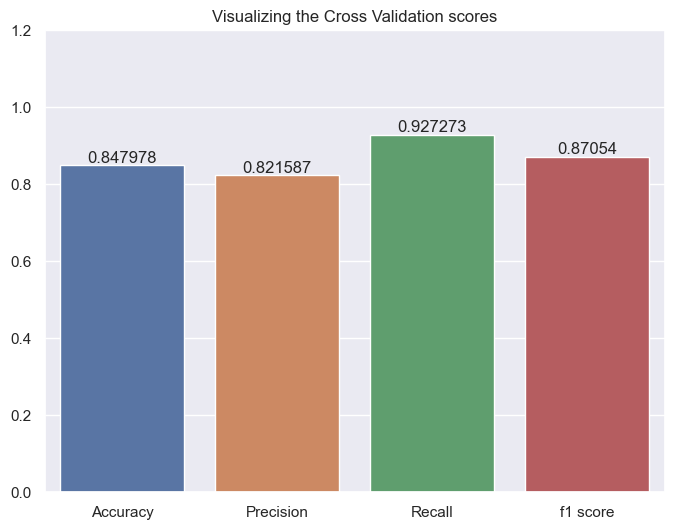

In [288]:
sns.set(font_scale=1)
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                          'Precision': cv_presn,
                          'Recall': cv_recall,
                          'f1 score': cv_f1}, 
                         index=[0])

fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.barplot(cv_metrics)

for container in ax.containers:
    ax.bar_label(container)
    

plt.title('Visualizing the Cross Validation scores')
plt.yticks(np.arange(0, 1.4, step=0.2))
plt.show()

## Significant Features - acc to the Model

In [289]:
# fit an instance of Logistic Regression
clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [290]:
clf.coef_

array([[ 0.00320769, -0.86062047,  0.66001431, -0.01155971, -0.00166496,
         0.04017239,  0.31603402,  0.02458922, -0.6047017 , -0.56795457,
         0.45085391, -0.63733326, -0.6755509 ]])

In [294]:
# match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0032076873709286024,
 'sex': -0.8606204735539111,
 'cp': 0.6600143086174385,
 'trestbps': -0.01155970641957489,
 'chol': -0.0016649609500147373,
 'fbs': 0.04017238940156104,
 'restecg': 0.3160340177157746,
 'thalach': 0.02458922261936637,
 'exang': -0.6047017032281077,
 'oldpeak': -0.567954572983317,
 'slope': 0.4508539117301764,
 'ca': -0.6373332602422034,
 'thal': -0.6755508982355707}

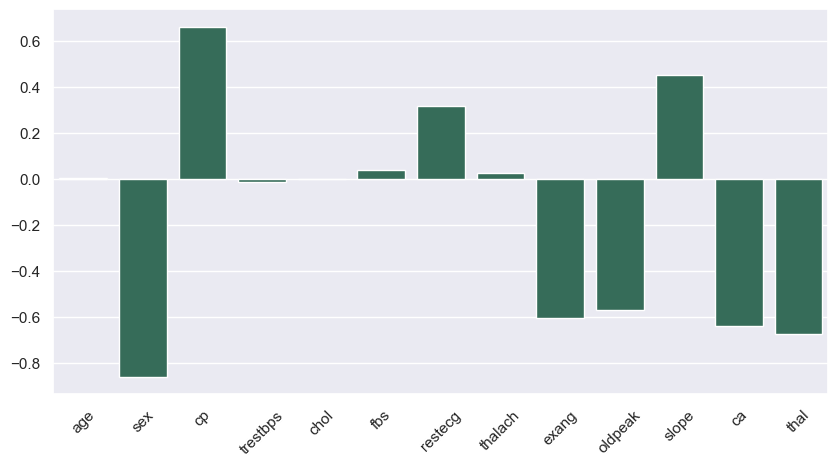

In [316]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
# feature_df.T.plot.bar(title='Feature Importance', legend=False)

plt.figure(figsize=(10, 5))
sns.barplot(feature_df, color='#2d755c')
plt.xticks(rotation=45)
plt.show()

In [317]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [318]:
pd.crosstab(df['slope'], df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## Exporting the model for reuse

In [321]:
pickle.dump(clf, open('model.pkl', 'wb'))
loaded_model = pickle.load(open('model.pkl', 'rb'))

In [323]:
df.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


In [326]:
my_list = []
for column in df.drop(columns=['target']).columns:
    my_list.append(df[column].mean())

In [334]:
def verdict(list):
    if loaded_model.predict([my_list]) == 1:
        print("You my friend have a heart complication! :(")
    else:
        print("Your heart is healthy! :)")

In [335]:
verdict(my_list)

You my friend have a heart complication! :(
